In [177]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
path1 = 'refinery/'
path2 = 'temperature/'
ref_files = os.listdir(path1)
temp_files = os.listdir(path2)

In [3]:
months = ['فروردین','اردیبهشت','خرداد','تیر','مرداد','شهریور','مهر','آبان','آذر','دی','بهمن','اسفند']
d_temp = pd.DataFrame([])
for i in range(5):
    for name in months:
        d = pd.read_excel(os.path.join(path2,temp_files[i]),sheet_name=name)
        d = d[d.columns[[0,2]]]
        d_temp = pd.concat((d_temp,d))

In [4]:
d_ref = pd.DataFrame([])
for i in range(5):
    for name in months:
        d = np.transpose(pd.read_excel(os.path.join(path1,ref_files[i]),sheet_name=name))
        d.columns = d.iloc[0]
        d.drop(index='Unnamed: 0',inplace=True)
        d_ref = pd.concat((d_ref,d))

In [5]:
d_ref.index = np.arange(0,len(d_ref.index))
d_temp.index = d_ref.index
data = pd.concat((d_temp,d_ref),axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 0 to 1825
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   تاریخ                                                  1826 non-null   object 
 1   دمای میانگین
(ċ)                                       1826 non-null   float64
 2   دبي آب ورودي تصفيه خانه (مترمكعب)                      1814 non-null   object 
 3   دبي خروجي تصفيه خانه (مترمكعب)                         1814 non-null   object 
 4   كدورت آب ورودي در 95 درصد شرايط (NTU)                  1814 non-null   object 
 5   حداكثر كدورت (آب ورودي) (NTU)                          1814 non-null   object 
 6   مدت زمان كدورت حداكثر(آب ورودي)                        1814 non-null   object 
 7   كدورت آب تصفيه (NTU)                                   1807 non-null   object 
 8   مصرف مواد منعقد كننده اوليه -خالص (كيلوگرم)          

In [6]:
years = ['1398','1399','1400','1401','1402']
d_rain = pd.DataFrame([])
for year in years:
    d = np.transpose(pd.read_excel('آمار بارندگی روزانه.xlsx',sheet_name=year))
    d.drop(columns=d.columns[0:3],inplace=True)
    for col in d.columns:
        d_rain = pd.concat((d_rain,d[col][1:-1]))
ind = np.where(d_rain.isnull())[0]
d_rain.index = np.arange(0,d_rain.shape[0])
d_rain.drop(index=ind,inplace=True)

In [7]:
d_rain.index = data.index
data = pd.concat((data,d_rain),axis=1)

In [8]:
col_names = list(data.columns)
col_names[-1] = 'بارندگی'
data.columns = col_names

In [9]:
data

,تاریخ,دمای میانگین\n(ċ),دبي آب ورودي تصفيه خانه (مترمكعب),دبي خروجي تصفيه خانه (مترمكعب),كدورت آب ورودي در 95 درصد شرايط (NTU),حداكثر كدورت (آب ورودي) (NTU),مدت زمان كدورت حداكثر(آب ورودي),كدورت آب تصفيه (NTU),مصرف مواد منعقد كننده اوليه -خالص (كيلوگرم),كل جامدات محلول (TDS)-آب خام ورودي (ميلي گرم بر ليتر),كل جامدات محلول (TDS)-آب تصفيه (ميلي گرم بر ليتر),بارندگی
0,1398/1/1,9.1,3100,3040,350,700,05:00,0.8,15.48,393,393,0
1,1398/1/2,9.9,3070,3010,550,1500,04:00,0.85,20.64,390,390,0.0
2,1398/1/3,11.9,3500,3440,750,2000,05:00,0.8,25.8,377,377,0.0
3,1398/1/4,14.8,3000,2940,1800,2500,07:00,0.85,25.8,500,500,0.0
4,1398/1/5,12.4,3800,3740,1700,2500,05:00,0.8,22.36,450,450,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1402/12/25,14.8,6700,6600,650,740,04:00,1.2,14.5,1500,1505,0.0
1822,1402/12/26,16.6,6700,6600,650,740,04:00,1.2,14.5,1500,1505,0.0
1823,1402/12/27,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1824,1402/12/28,16.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
data.fillna(method='ffill',inplace=True)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_2784\286314875.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


In [11]:
data[['دمای میانگین\n(ċ)','بارندگی']]

,دمای میانگین\n(ċ),بارندگی
0,9.1,0.0
1,9.9,0.0
2,11.9,0.0
3,14.8,0.0
4,12.4,16.0
...,...,...
1821,14.8,0.0
1822,16.6,0.0
1823,15.8,0.0
1824,16.8,0.0


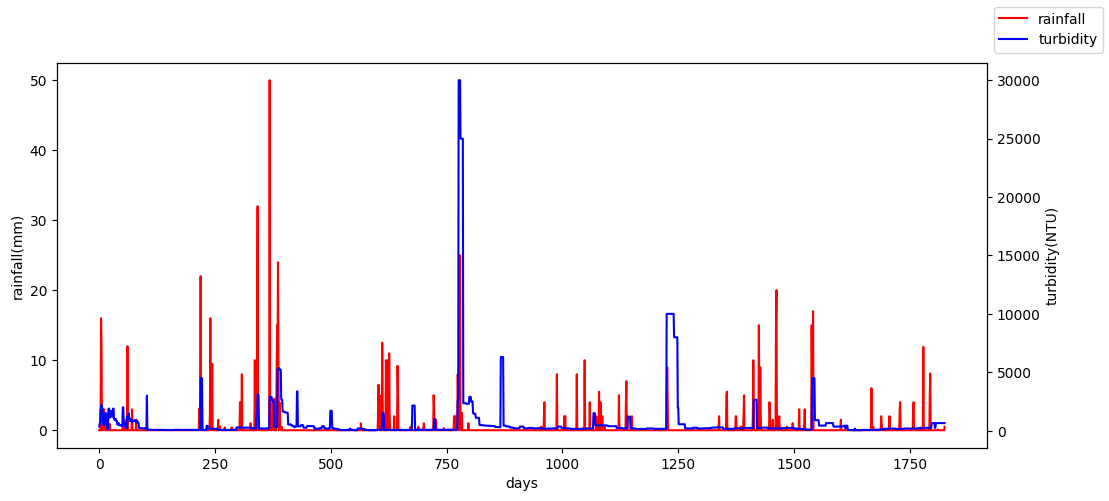

In [12]:
fig,ax1 = plt.subplots(figsize=[12,5])
ax1.plot(data['بارندگی'],color='red',label='rainfall')
ax1.set_xlabel('days')
ax1.set_ylabel('rainfall(mm)')
ax2 = ax1.twinx()
ax2.plot(data['كدورت آب ورودي در 95 درصد شرايط (NTU)'],color='blue',label='turbidity')
ax2.set_ylabel('turbidity(NTU)')
fig.legend()

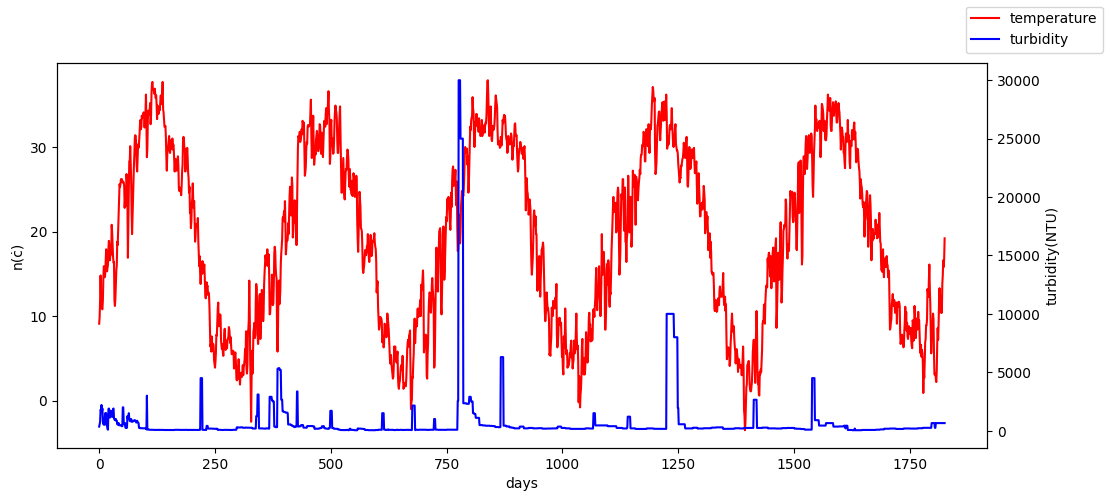

In [13]:
fig,ax1 = plt.subplots(figsize=[12,5])
ax1.plot(data['دمای میانگین\n(ċ)'],color='red',label='temperature')
ax1.set_xlabel('days')
ax1.set_ylabel('n(ċ)')
ax2 = ax1.twinx()
ax2.plot(data['كدورت آب ورودي در 95 درصد شرايط (NTU)'],color='blue',label='turbidity')
ax2.set_ylabel('turbidity(NTU)')
fig.legend()

In [180]:
print('پیش بینی کدورت آب ورودی')
X = data['بارندگی']
y = data['كدورت آب ورودي در 95 درصد شرايط (NTU)']
v_n = [1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print('Neural Net with one feature')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = RF_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Random forest with one feature')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = GB_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Gradient boosting with one feature')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی کل جامدات محلول در آب ورودی')
X = data['بارندگی']
y = data['كل جامدات محلول (TDS)-آب خام ورودي (ميلي گرم بر ليتر)']
v_n = [1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print('Neural Net with one feature')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = RF_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Random forest with one feature')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = GB_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Gradient boosting with one feature')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی مصرف مواد منعقد کننده آب ورودی')
X = data['بارندگی']
y = data['مصرف مواد منعقد كننده اوليه -خالص (كيلوگرم)']
v_n = [1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print('Neural Net with one feature')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = RF_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Random forest with one feature')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = GB_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Gradient boosting with one feature')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

پیش بینی کدورت آب ورودی


C:\Users\Shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net with one feature
mean squared value is: 4268481.027013099 

r2 score is: -10.858424596904326


 Random forest with one feature
mean squared value is: 4190584.707520013 

r2 score is: -9.997894725698567


 Gradient boosting with one feature
mean squared value is: 4149596.9354729233 

r2 score is: -12.151054391674581




پیش بینی کل جامدات محلول در آب ورودی


C:\Users\Shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net with one feature
mean squared value is: 254005.79139932565 

r2 score is: -61.6380183402259


 Random forest with one feature
mean squared value is: 23814650.03236038 

r2 score is: -10.750963811793154


 Gradient boosting with one feature
mean squared value is: 22454729.423850194 

r2 score is: -10.808765880777333




پیش بینی مصرف مواد منعقد کننده آب ورودی
Neural Net with one feature
mean squared value is: 133.38156393217938 

r2 score is: -41.439938027371426


 Random forest with one feature
mean squared value is: 134.66619199206298 

r2 score is: -38.05812355444496


 Gradient boosting with one feature
mean squared value is: 134.75514341562808 

r2 score is: -32.645787544288524


In [149]:
print('پیش بینی کل کدورت آب ورودی')
X = data[['دمای میانگین\n(ċ)','بارندگی','دبي آب ورودي تصفيه خانه (مترمكعب)']]
y = data['كدورت آب ورودي در 95 درصد شرايط (NTU)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print('\n\n Neural net with 3 features')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor(n_estimators=100,max_depth=35,criterion='squared_error',random_state=100)
RF_Regressor.fit(X_train,y_train)
y_pred = RF_Regressor.predict(X_test)
print('\n\n Random forest with 3 features')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,max_depth=3,random_state=100)
GB_Regressor.fit(X_train,y_train)
y_pred = GB_Regressor.predict(X_test)
print('\n\n Gradient boosting with 3 features')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

# cross validation
RF_Regressor = RandomForestRegressor()
y_pred = cross_val_predict(RF_Regressor,X.to_numpy().reshape(-1,1),y)
print('\n\n Random forest with one feature (cross validation)')
print(f'mean squared value is: {mean_squared_error(y_pred,y)} \n')
print(f'r2 score is: {r2_score(y_pred,y)}')
GB_Regressor = GradientBoostingRegressor()
y_pred = cross_val_predict(GB_Regressor,X.to_numpy().reshape(-1,1),y)
print('\n\n Gradient Boosting with one feature (cross validation)')
print(f'mean squared value is: {mean_squared_error(y_pred,y)} \n')
print(f'r2 score is: {r2_score(y_pred,y)}')


print('\n\n\n')
print('پیش بینی کل جامدات محلول در آب ورودی')
X = data[['دمای میانگین\n(ċ)','بارندگی','دبي آب ورودي تصفيه خانه (مترمكعب)']]
y = data['كل جامدات محلول (TDS)-آب خام ورودي (ميلي گرم بر ليتر)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print('\n\n Neural net with 3 features')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor(n_estimators=100,max_depth=35,criterion='squared_error',random_state=100)
RF_Regressor.fit(X_train,y_train)
y_pred = RF_Regressor.predict(X_test)
print('\n\n Random forest with 3 features')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,max_depth=3,random_state=100)
GB_Regressor.fit(X_train,y_train)
y_pred = GB_Regressor.predict(X_test)
print('\n\n Gradient boosting with 3 features')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی مصرف مواد منعقد کننده آب ورودی')
X = data[['دمای میانگین\n(ċ)','بارندگی','دبي آب ورودي تصفيه خانه (مترمكعب)']]
y = data['مصرف مواد منعقد كننده اوليه -خالص (كيلوگرم)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print('\n\n Neural net with 3 features')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor(n_estimators=100,max_depth=35,criterion='squared_error',random_state=100)
RF_Regressor.fit(X_train,y_train)
y_pred = RF_Regressor.predict(X_test)
print('\n\n Random forest with 3 features')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,max_depth=3,random_state=100)
GB_Regressor.fit(X_train,y_train)
y_pred = GB_Regressor.predict(X_test)
print('\n\n Gradient boosting with 3 features')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')


پیش بینی کل کدورت آب ورودی


 Neural net with 3 features

 
 mean squared value is: 4026722.4973186683 

r2 score is: -188.62633309697074


 Random forest with 3 features

 
 mean squared value is: 1054955.35508544 

r2 score is: 0.7159373632217453


 Gradient boosting with 3 features

 
 mean squared value is: 774070.8503242803 

r2 score is: 0.7942959597383499




پیش بینی کل جامدات محلول در آب ورودی


 Neural net with 3 features

 
 mean squared value is: 14464069.723669173 

r2 score is: -15.078348234657987


 Random forest with 3 features

 
 mean squared value is: 11690335617.695353 

r2 score is: -0.007052360190092255


 Gradient boosting with 3 features

 
 mean squared value is: 33860743285.841995 

r2 score is: -0.0011506445677937904




پیش بینی مصرف مواد منعقد کننده آب ورودی


 Neural net with 3 features

 
 mean squared value is: 125.78896807608513 

r2 score is: -4.4497405582861385


 Random forest with 3 features

 
 mean squared value is: 33.26823507716955 

r2 score is

In [41]:
d_temp_av = []
for i in range(5):
    for name in months:
        d = pd.read_excel(os.path.join(path2,temp_files[i]),sheet_name=name)
        d = d[d.columns[2]].mean()
        d_temp_av.append(d)
d_temp_av

[15.348387096774193,
 21.641935483870963,
 28.0,
 34.53870967741935,
 32.83870967741935,
 28.183870967741935,
 23.47333333333334,
 12.586666666666666,
 7.27,
 5.266666666666667,
 5.369999999999999,
 12.248275862068965,
 13.645161290322578,
 21.66774193548387,
 30.90645161290323,
 30.741935483870968,
 32.332258064516125,
 26.803225806451607,
 20.280000000000005,
 15.083333333333332,
 6.4366666666666665,
 3.9033333333333338,
 8.5,
 9.963333333333335,
 19.135483870967743,
 24.46129032258065,
 31.59354838709677,
 32.932258064516134,
 31.95806451612903,
 30.04516129032258,
 21.830000000000002,
 12.580000000000002,
 8.926666666666666,
 5.500000000000001,
 5.636666666666668,
 13.006896551724138,
 18.89354838709677,
 22.896774193548385,
 28.58709677419355,
 33.041935483870965,
 31.758064516129036,
 28.319354838709682,
 24.793333333333326,
 14.820000000000002,
 9.13,
 3.3833333333333333,
 4.0,
 14.43793103448276,
 17.45806451612903,
 23.54193548387097,
 30.180645161290318,
 33.17741935483871,
 

In [154]:
d_tur_av = []
d_tds_av = []
d_mat_av = []
d_debi_av = []
for i in range(5):
    for name in months:
        d = np.transpose(pd.read_excel(os.path.join(path1,ref_files[i]),sheet_name=name))
        d.columns = d.iloc[0]
        d.drop(index='Unnamed: 0',inplace=True)
        d_tur_av.append(d[d.columns[2]].mean())
        d_tds_av.append(d[d.columns[7]].mean())
        d_mat_av.append(d[d.columns[6]].mean())
        d_debi_av.append(d[d.columns[0]].mean())

In [155]:
d_rain_av = []
for year in years:
    d = np.transpose(pd.read_excel('آمار بارندگی روزانه.xlsx',sheet_name=year))
    d.drop(columns=d.columns[0:3],inplace=True)
    for col in d.columns:
        d_rain_av.append(d[col][-1])

C:\Users\Shiva\AppData\Local\Temp\ipykernel_2784\1055042494.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d_rain_av.append(d[col][-1])
C:\Users\Shiva\AppData\Local\Temp\ipykernel_2784\1055042494.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d_rain_av.append(d[col][-1])
C:\Users\Shiva\AppData\Local\Temp\ipykernel_2784\1055042494.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d_rain_av.append(d[col][-1])
C:\Users\Shiv

In [156]:
data_av = pd.DataFrame()
data_av['کدورت متوسط'] = d_tur_av
data_av['دمای متوسط'] = d_temp_av
data_av['مجموع بارش'] = d_rain_av
data_av['دبی متوسط'] = d_debi_av
data_av['مواد منعقد کننده متوسط'] = d_mat_av
data_av['محلول در آب متوسط'] = d_tds_av

In [162]:
data_av

,کدورت متوسط,دمای متوسط,مجموع بارش,دبی متوسط,مواد منعقد کننده متوسط,محلول در آب متوسط
0,1191.451613,15.348387,35.9,4558.225806,18.778710,422.483871
1,751.612903,21.641935,13.9,3796.774194,15.063871,422.741935
2,727.354839,28.000000,4.8,4636.354839,17.645161,652.516129
3,211.258065,34.538710,0.0,5641.258065,13.858065,504.225806
4,62.451613,32.838710,0.0,5942.129032,5.216129,544.677419
5,66.806452,28.183871,0.0,6523.419355,5.183871,634.000000
6,66.133333,23.473333,0.0,6540.666667,5.290000,655.000000
7,734.500000,12.586667,67.4,6280.866667,12.213333,579.500000
8,101.100000,7.270000,2.4,5966.000000,6.516667,491.666667
9,130.833333,5.266667,7.4,6008.833333,7.300000,498.275862


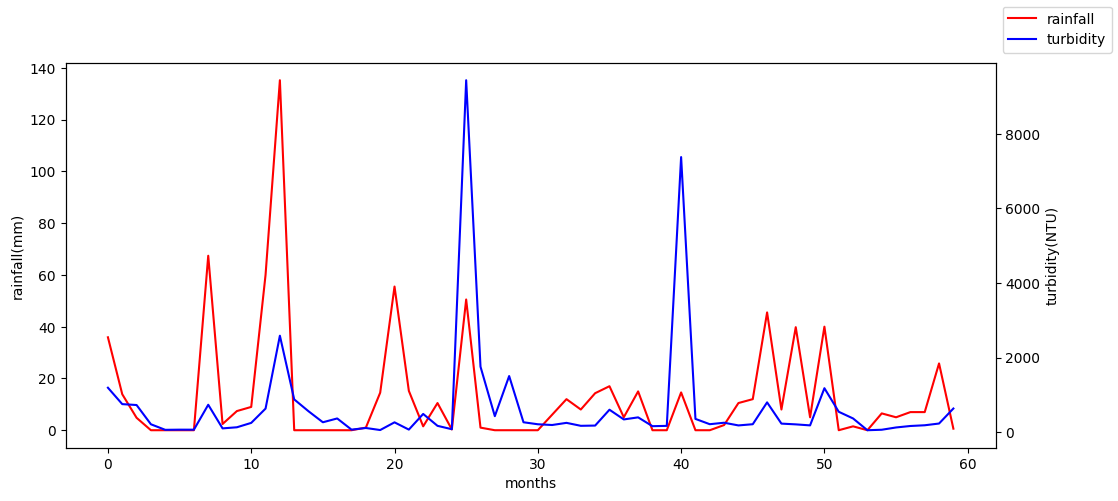

In [20]:
fig,ax1 = plt.subplots(figsize=[12,5])
ax1.plot(data_av['مجموع بارش'],color='red',label='rainfall')
ax1.set_xlabel('months')
ax1.set_ylabel('rainfall(mm)')
ax2 = ax1.twinx()
ax2.plot(data_av['کدورت متوسط'],color='blue',label='turbidity')
ax2.set_ylabel('turbidity(NTU)')
fig.legend()

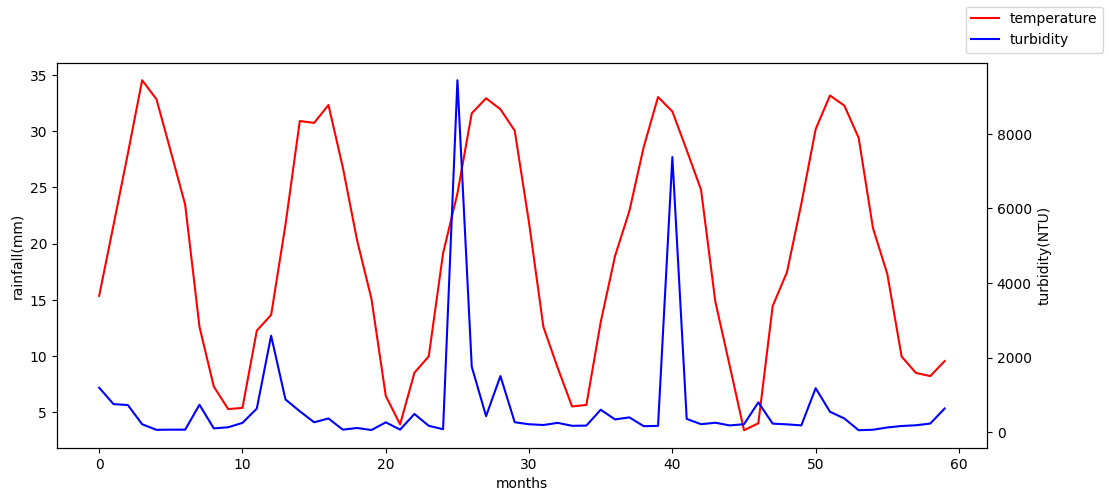

In [21]:
fig,ax1 = plt.subplots(figsize=[12,5])
ax1.plot(data_av['دمای متوسط'],color='red',label='temperature')
ax1.set_xlabel('months')
ax1.set_ylabel('rainfall(mm)')
ax2 = ax1.twinx()
ax2.plot(data_av['کدورت متوسط'],color='blue',label='turbidity')
ax2.set_ylabel('turbidity(NTU)')
fig.legend()

In [159]:
print('پیش بینی کل جامدات محلول در آب ورودی')
X = data_av['مجموع بارش']
y = data_av['کدورت متوسط']
v_n = [1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print('Neural Net with one feature for monthly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = RF_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Random forest with one feature for monthly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = GB_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Gradient boosting with one feature for monthly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی کل جامدات محلول در آب ورودی')
X = data_av['مجموع بارش']
y = data_av['محلول در آب متوسط']
v_n = [1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print('Neural Net with one feature for monthly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = RF_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Random forest with one feature for monthly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = GB_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Gradient boosting with one feature for monthly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی مواد منقعد کننده در آب ورودی')
X = data_av['مجموع بارش']
y = data_av['مواد منعقد کننده متوسط']
v_n = [1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print('Neural Net with one feature for monthly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = RF_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Random forest with one feature for monthly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = GB_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Gradient boosting with one feature for monthly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

پیش بینی کل جامدات محلول در آب ورودی


C:\Users\Shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net with one feature for monthly data
mean squared value is: 4032349.4473628434 

r2 score is: -5.116396258439313


 Random forest with one feature for monthly data
mean squared value is: 4618718.723839889 

r2 score is: -27.027557193064723


 Gradient boosting with one feature for monthly data
mean squared value is: 4652900.6706276825 

r2 score is: -31.438786714028552




پیش بینی کل جامدات محلول در آب ورودی


C:\Users\Shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net with one feature for monthly data
mean squared value is: 1246418.6855022602 

r2 score is: -0.9345867780662465


 Random forest with one feature for monthly data
mean squared value is: 226503.8568240963 

r2 score is: -6.206345674060754


 Gradient boosting with one feature for monthly data
mean squared value is: 244828.7976103262 

r2 score is: -3.8156396856859462




پیش بینی مواد منقعد کننده در آب ورودی
Neural Net with one feature for monthly data
mean squared value is: 159.1396409984604 

r2 score is: -23.276338136183785


 Random forest with one feature for monthly data
mean squared value is: 141.2123105149445 

r2 score is: -7.83758501674461


 Gradient boosting with one feature for monthly data
mean squared value is: 158.40822364447314 

r2 score is: -5.528352872057335


C:\Users\Shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [164]:
print('پیش بینی کدورت آب ورودی')
X = data_av[['دبی متوسط','دمای متوسط','مجموع بارش']]
y = data_av['کدورت متوسط']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print('\n\n Neural net with 3 features for monthly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train,y_train)
y_pred = RF_Regressor.predict(X_test)
print('\n\n Random forest with 3 features for monthly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train,y_train)
y_pred = GB_Regressor.predict(X_test)
print('\n\n Gradient boosting with 3 features for monthly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی کل جامدات محلول در آب ورودی')
X = data_av[['دبی متوسط','دمای متوسط','مجموع بارش']]
y = data_av['محلول در آب متوسط']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print('\n\n Neural net with 3 features for monthly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train,y_train)
y_pred = RF_Regressor.predict(X_test)
print('\n\n Random forest with 3 features for monthly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train,y_train)
y_pred = GB_Regressor.predict(X_test)
print('\n\n Gradient boosting with 3 features for monthly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')


print('\n\n\n')
print('پیش بینی مواد منعقد کننده در آب ورودی')
X = data_av[['دبی متوسط','دمای متوسط','مجموع بارش']]
y = data_av['مواد منعقد کننده متوسط']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print('\n\n Neural net with 3 features for monthly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train,y_train)
y_pred = RF_Regressor.predict(X_test)
print('\n\n Random forest with 3 features for monthly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train,y_train)
y_pred = GB_Regressor.predict(X_test)
print('\n\n Gradient boosting with 3 features for monthly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')


پیش بینی کدورت آب ورودی


C:\Users\Shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(




 Neural net with 3 features for monthly data

 
 mean squared value is: 4372973.651861579 

r2 score is: -79.89584617075613


 Random forest with 3 features for monthly data

 
 mean squared value is: 4407260.88043597 

r2 score is: -108.42074993152556


 Gradient boosting with 3 features for monthly data

 
 mean squared value is: 4351030.377656476 

r2 score is: -62.69440295344655




پیش بینی کل جامدات محلول در آب ورودی


 Neural net with 3 features for monthly data

 
 mean squared value is: 184369.42267709534 

r2 score is: -12.244513705437358


 Random forest with 3 features for monthly data

 
 mean squared value is: 246886.32232498817 

r2 score is: -8.216887594943667


 Gradient boosting with 3 features for monthly data

 
 mean squared value is: 321556.3675696165 

r2 score is: -3.2330061167553605




پیش بینی مواد منعقد کننده در آب ورودی


 Neural net with 3 features for monthly data

 
 mean squared value is: 165.9112714673012 

r2 score is: -8.112872150228918


 Random f

In [174]:
data_weekly = pd.DataFrame([])
for i in range(data.shape[0]//7):
    d = data.iloc[1+7*i-1:(i+1)*7]
    t1 = d[d.columns[[1,2,4,8,9]]].mean()
    t2 = d[d.columns[-1]].sum()
    data_weekly = pd.concat((data_weekly,pd.concat((t1,pd.Series(t2)))),axis=1)
data_weekly = np.transpose(data_weekly)
data_weekly.columns = ['دمای متوسط','دبی متوسط','کدورت متوسط','مواد منعقد کننده متوسط','محلول در آب متوسط','مجموع بارش']

In [175]:
data_weekly

,دمای متوسط,دبی متوسط,کدورت متوسط,مواد منعقد کننده متوسط,محلول در آب متوسط,مجموع بارش
0,11.471429,4088.571429,1285.714286,22.605714,444.285714,28.5
0,14.042857,4957.142857,988.571429,21.980000,464.285714,5.0
0,16.471429,4450.000000,817.857143,13.391429,427.142857,1.5
0,18.071429,4347.857143,1517.142857,14.865714,368.428571,0.9
0,15.871429,5100.000000,1374.285714,21.868571,386.142857,0.0
...,...,...,...,...,...,...
0,11.400000,6700.000000,245.000000,12.900000,1500.000000,0.0
0,9.985714,6700.000000,360.714286,13.157143,1500.000000,13.2
0,6.285714,6700.000000,534.285714,13.414286,1500.000000,0.0
0,5.714286,6700.000000,650.000000,14.500000,1500.000000,0.1


In [173]:
print('پیش بینی کدورت آب ورودی')
X = data_weekly['مجموع بارش']
y = data_weekly['کدورت متوسط']
v_n = [1000,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print('Neural Net with one feature for weekly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = RF_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Random forest with one feature for weekly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = GB_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Gradient boosting with one feature for weekly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی کل جامدات محلول در آب ورودی')
X = data_weekly['مجموع بارش']
y = data_weekly['محلول در آب متوسط']
v_n = [1000,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print('Neural Net with one feature for weekly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = RF_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Random forest with one feature for weekly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = GB_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Gradient boosting with one feature for weekly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی مواد منعقد کننده در آب ورودی')
X = data_weekly['مجموع بارش']
y = data_weekly['مواد منعقد کننده متوسط']
v_n = [1000,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy().reshape(-1,1))
scaler.transform(X_test.to_numpy().reshape(-1,1))
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = neuralNetRegressor.predict(X_test.to_numpy().reshape(-1,1))
print('Neural Net with one feature for weekly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = RF_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Random forest with one feature for weekly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train.to_numpy().reshape(-1,1),y_train)
y_pred = GB_Regressor.predict(X_test.to_numpy().reshape(-1,1))
print('\n\n Gradient boosting with one feature for weekly data')
print(f'mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

پیش بینی کدورت آب ورودی


C:\Users\Shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net with one feature for weekly data
mean squared value is: 11236164.4662114 

r2 score is: -37.147959240579965


 Random forest with one feature for weekly data
mean squared value is: 11826322.664145738 

r2 score is: -140.27621764000827


 Gradient boosting with one feature for weekly data
mean squared value is: 12155230.721984217 

r2 score is: -658.4020573992749




پیش بینی کل جامدات محلول در آب ورودی


C:\Users\Shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net with one feature for weekly data
mean squared value is: 584748.4764210718 

r2 score is: -3.9648034910420913


 Random forest with one feature for weekly data
mean squared value is: 50847353.87850936 

r2 score is: -2.2126254022798255


 Gradient boosting with one feature for weekly data
mean squared value is: 31665159.786234338 

r2 score is: -2.1521273874480054




پیش بینی مواد منعقد کننده در آب ورودی
Neural Net with one feature for weekly data
mean squared value is: 145.63591626676543 

r2 score is: -96.82249937642287


 Random forest with one feature for weekly data
mean squared value is: 178.77532653600213 

r2 score is: -6.706319572566297


 Gradient boosting with one feature for weekly data
mean squared value is: 190.89739120186363 

r2 score is: -4.677757249457237


In [176]:
print('پیش بینی کدورت آب ورودی')
v_n = [1000]
X = data_weekly[['دبی متوسط','دمای متوسط','مجموع بارش']]
y = data_weekly['کدورت متوسط']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print('\n\n Neural net with 3 features for weekly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train,y_train)
y_pred = RF_Regressor.predict(X_test)
print('\n\n Random forest with 3 features for weekly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train,y_train)
y_pred = GB_Regressor.predict(X_test)
print('\n\n Gradient boosting with 3 features for weekly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی کل جامدات محلول در آب ورودی')
v_n = [1000]
X = data_weekly[['دبی متوسط','دمای متوسط','مجموع بارش']]
y = data_weekly['محلول در آب متوسط']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print('\n\n Neural net with 3 features for weekly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train,y_train)
y_pred = RF_Regressor.predict(X_test)
print('\n\n Random forest with 3 features for weekly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train,y_train)
y_pred = GB_Regressor.predict(X_test)
print('\n\n Gradient boosting with 3 features for weekly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

print('\n\n\n')
print('پیش بینی مواد منعقد کننده در آب ورودی')
v_n = [1000]
X = data_weekly[['دبی متوسط','دمای متوسط','مجموع بارش']]
y = data_weekly['مواد منعقد کننده متوسط']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
neuralNetRegressor = MLPRegressor(v_n)
neuralNetRegressor.fit(X_train,y_train)
y_pred = neuralNetRegressor.predict(X_test)
print('\n\n Neural net with 3 features for weekly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train,y_train)
y_pred = RF_Regressor.predict(X_test)
print('\n\n Random forest with 3 features for weekly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')
GB_Regressor = GradientBoostingRegressor()
GB_Regressor.fit(X_train,y_train)
y_pred = GB_Regressor.predict(X_test)
print('\n\n Gradient boosting with 3 features for weekly data')
print(f'\n \n mean squared value is: {mean_squared_error(y_pred,y_test)} \n')
print(f'r2 score is: {r2_score(y_pred,y_test)}')

پیش بینی کدورت آب ورودی


C:\Users\Shiva\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(




 Neural net with 3 features for weekly data

 
 mean squared value is: 11761729.473942272 

r2 score is: -1014.5324960865356


 Random forest with 3 features for weekly data

 
 mean squared value is: 10779912.99318074 

r2 score is: -10.501247080653132


 Gradient boosting with 3 features for weekly data

 
 mean squared value is: 10696354.173262555 

r2 score is: -7.308797295129766




پیش بینی کل جامدات محلول در آب ورودی


 Neural net with 3 features for weekly data

 
 mean squared value is: 20210410.43557369 

r2 score is: -17.016641770824968


 Random forest with 3 features for weekly data

 
 mean squared value is: 499958496.22875136 

r2 score is: -0.011546817187702674


 Gradient boosting with 3 features for weekly data

 
 mean squared value is: 168687.6269950997 

r2 score is: -0.9766311332417976




پیش بینی مواد منعقد کننده در آب ورودی


 Neural net with 3 features for weekly data

 
 mean squared value is: 12785.847763260741 

r2 score is: -17.033995754341984


 Random 